In [1]:
import sys; sys.path.append("../../")
import pandas as pd
import matplotlib.pyplot as plt
from DataPreprocessing.DataPreprocessing import *
from utils import *
from CorrelationAnalysis import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


# Analyze Installs


## Question 1
    Is there any bias towards certain categories that have significant high installs? does category affect installs? 

## Read Data

In [2]:
# read data as dataframe from csv file
df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
print(df.shape)

C:\Users\dell\AppData\Local\Temp\ipykernel_12128\377713779.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
b'Skipping line 78700: expected 20 fields, saw 21\nSkipping line 85033: expected 20 fields, saw 21\n'
b'Skipping line 128092: expected 20 fields, saw 22\n'
b'Skipping line 197000: expected 20 fields, saw 21\nSkipping line 218421: expected 20 fields, saw 21\n'
b'Skipping line 330474: expected 20 fields, saw 21\nSkipping line 337681: expected 20 fields, saw 21\n'
b'Skipping line 556266: expected 20 fields, saw 21\n'
b'Skipping line 641092: expected 20 fields, saw 21\n'
b'Skipping line 759119: expected 20 fields, saw 21\n'
b'Skipping line 801997: expected 20 fields, saw 22\n'
b'Skipping line 823248: expected 20 fields, saw 21\n'
b'Skipping line 1044981: expected 20 fields, saw 21\n'
b'Skipping line 1138871: e

(1900333, 20)


In [3]:
df.head()


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0.0,10000000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0.0,2.9000000,5.0 and up,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0.0,3.7000000,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0.0,1.8000000,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0.0,6.2000000,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


## Clean

In [4]:
df = convert_to_numeric(df)
df=convert_binary(df)

../..\DataPreprocessing\DataPreprocessing.py:265: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
../..\DataPreprocessing\DataPreprocessing.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('True', '1')
../..\DataPreprocessing\DataPreprocessing.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [5]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1768526,Simple Keyboard Theme,com.ikeyboard.theme.simple,Personalization,4.2,16,1000.0,1000,2947,1,0.0,0.000003,4.1,Theme Design Apps for Android,waxisws@gmail.com,"Apr 29, 2019","Apr 27, 2020",Everyone,1,0,0
1795369,Man Hairstyle Photo Editor,com.photoeditor.man.menhairstyle,Photography,3.7,14,1000.0,1000,4336,1,0.0,0.000008,4.4,Photo Editor and Photo Frame 2021,musicinfoteach@gmail.com,"Jul 4, 2019","Aug 31, 2020",Everyone,1,0,0
1176451,The beauty of the blue planet Earth,com.topwallpaperz.thebeautyoftheblueplanet,Personalization,4.5,6,1000.0,1000,1045,1,0.0,22.000000,2.2,topwallpaperz,topwallpaperz@ukr.net,"Mar 27, 2018","Mar 27, 2018",Everyone,1,0,0
1763836,"Book, The Mountebank",com.free074a81ba94cf6951221ca03606d56.user.ebo...,Books & Reference,0.0,0,0.0,0,0,1,0.0,0.000007,6.0,marszeta4,marszeta@gmail.com,"Apr 29, 2020","Apr 25, 2021",Teen,1,0,0
1673315,Systema Grill,br.com.app.gpu1658214.gpud3cdb9ed1330d222cc415...,Food & Drink,0.0,0,10.0,10,34,1,0.0,14.000000,4.0.3,Sávio Franco,savio.franco.sf@gmail.com,"May 19, 2017","May 19, 2017",Everyone,0,0,0
951507,Bidadari Surga - Syakir Daulay mp3 Offline,com.lagu_bidadari_surga_syakir_daulay.rayyan,Music & Audio,4.3,135,10000.0,10000,12167,1,0.0,45.000000,4.1,rayyan,ahmad.rayyan0220@gmail.com,"May 29, 2020","Feb 25, 2021",Everyone,1,0,0
910021,Idle Aquarium,com.funvai.idleaquarium,Simulation,3.8,105,10000.0,10000,29538,1,0.0,22.000000,4.1,Funvai,info@funvai.com,"Jul 4, 2019","Jul 11, 2019",Everyone,1,0,0
1024891,Speed Trap,com.lookupgame.speedtrap,Arcade,0.0,0,1000.0,1000,2818,1,0.0,13.000000,4.1,Lookup Game,lookupgame@gmail.com,"Oct 23, 2018","Nov 06, 2018",Teen,1,0,0
1412330,AmpliNeuro Oncology Scores,com.ionicframework.amplimedneuro978562,Medical,0.0,0,100.0,100,386,1,0.0,0.000002,4.1,AMPLISOFTWARE TECNOLOGIA LTDA,suporte@amplisoftware.com,"Mar 1, 2017","Sep 29, 2017",Everyone,0,0,0
1604374,Dental Designs,com.purplehealth.ginspaulsdental,Health & Fitness,0.0,0,10.0,10,45,1,0.0,19.000000,4.1,Purple Health,support@purplehealth.com,"Jan 9, 2018","May 09, 2018",Everyone,0,0,0


In [6]:
df_cat_installs = df.groupby(['Category'], group_keys=True).apply(lambda x: x)
df_cat_installs.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1768526,Simple Keyboard Theme,com.ikeyboard.theme.simple,Personalization,4.2,16,1000.0,1000,2947,1,0.0,0.000003,4.1,Theme Design Apps for Android,waxisws@gmail.com,"Apr 29, 2019","Apr 27, 2020",Everyone,1,0,0
1795369,Man Hairstyle Photo Editor,com.photoeditor.man.menhairstyle,Photography,3.7,14,1000.0,1000,4336,1,0.0,0.000008,4.4,Photo Editor and Photo Frame 2021,musicinfoteach@gmail.com,"Jul 4, 2019","Aug 31, 2020",Everyone,1,0,0
1176451,The beauty of the blue planet Earth,com.topwallpaperz.thebeautyoftheblueplanet,Personalization,4.5,6,1000.0,1000,1045,1,0.0,22.000000,2.2,topwallpaperz,topwallpaperz@ukr.net,"Mar 27, 2018","Mar 27, 2018",Everyone,1,0,0
1763836,"Book, The Mountebank",com.free074a81ba94cf6951221ca03606d56.user.ebo...,Books & Reference,0.0,0,0.0,0,0,1,0.0,0.000007,6.0,marszeta4,marszeta@gmail.com,"Apr 29, 2020","Apr 25, 2021",Teen,1,0,0
1673315,Systema Grill,br.com.app.gpu1658214.gpud3cdb9ed1330d222cc415...,Food & Drink,0.0,0,10.0,10,34,1,0.0,14.000000,4.0.3,Sávio Franco,savio.franco.sf@gmail.com,"May 19, 2017","May 19, 2017",Everyone,0,0,0


In [7]:

Installs = df.Installs.mean()

df_cat_avg_installs = df.groupby(['Category'])['Installs'].sum()

df_cat_avg_installs.head()

Category
Action             4465509.0
Adventure          4335557.0
Arcade             6490705.0
Art & Design       4206613.0
Auto & Vehicles    3606365.0
Name: Installs, dtype: float64

## Select Interesting  Variables

In [8]:
features_df = df[[ 'Installs', 'Size', 'Category','Minimum Android','Rating']]
print(features_df.shape)

(285049, 5)


In [9]:
features_df.head(10)

,Installs,Size,Category,Minimum Android,Rating
1768526,1000.0,0.000003,Personalization,4.1,4.2
1795369,1000.0,0.000008,Photography,4.4,3.7
1176451,1000.0,22.000000,Personalization,2.2,4.5
1763836,0.0,0.000007,Books & Reference,6.0,0.0
1673315,10.0,14.000000,Food & Drink,4.0.3,0.0
951507,10000.0,45.000000,Music & Audio,4.1,4.3
910021,10000.0,22.000000,Simulation,4.1,3.8
1024891,1000.0,13.000000,Arcade,4.1,0.0
1412330,100.0,0.000002,Medical,4.1,0.0
1604374,10.0,19.000000,Health & Fitness,4.1,0.0


## Installs values distribution
   

Text(0.5, 1.0, 'Average Installs per Category')

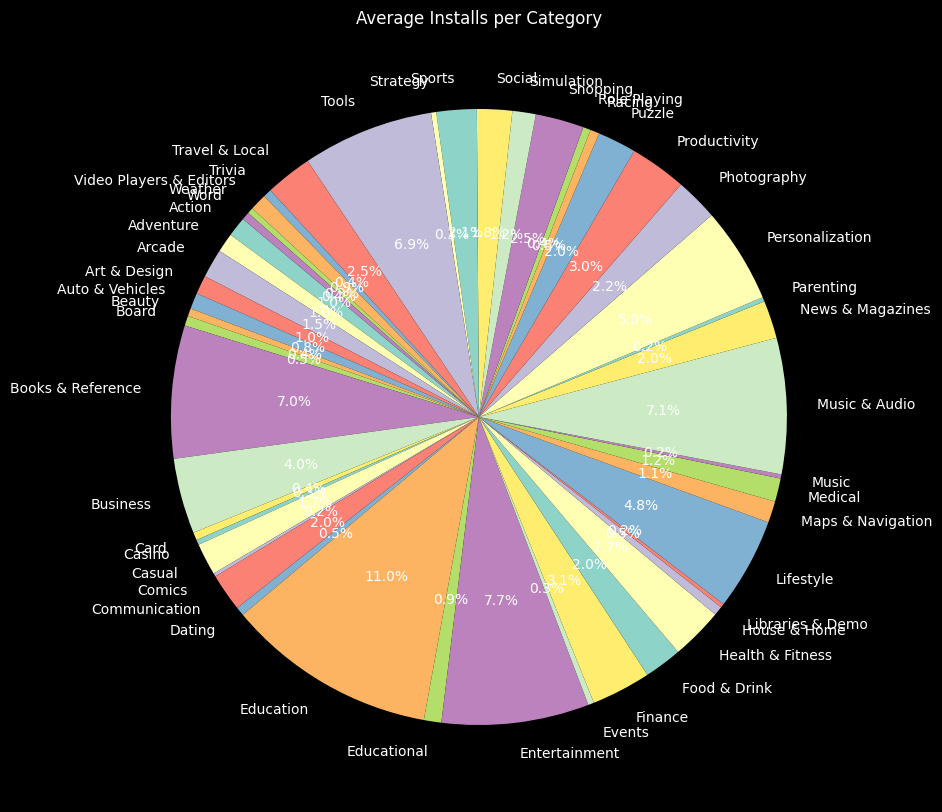

In [10]:
# plot pie chart for installs values
plt.figure(figsize=(10,10))
plt.pie(df_cat_avg_installs, labels=df_cat_avg_installs. index, autopct='%1.1f%%',  startangle=140)
plt.title('Average Installs per Category')


### Top 10 Categories

<Axes: title={'center': 'Top 20 Categories by Installs'}, xlabel='Category'>

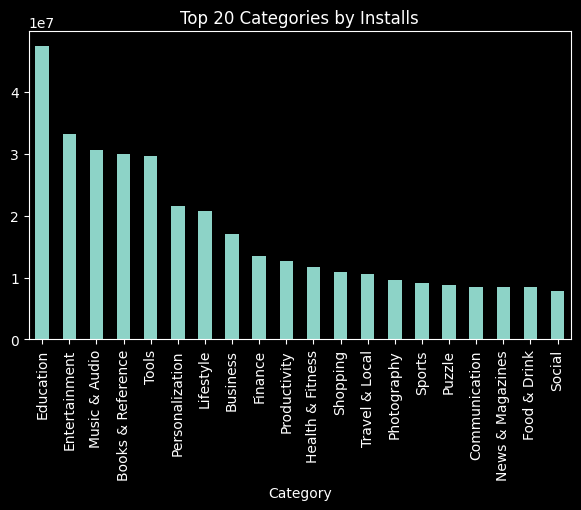

In [37]:
#get unique values of content rating
df_cat_avg_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(20)
df_cat_avg_installs.nlargest(20).plot(kind='bar', figsize=(7, 4), title='Top 20 Categories by Installs')


### Results:
    there's significance difference between number of installs
    in each category, so company may focus on top categories when
    designing new apps.

### Mean of app installs for ad supported/ not supported

Text(0, 0.5, 'Installs')

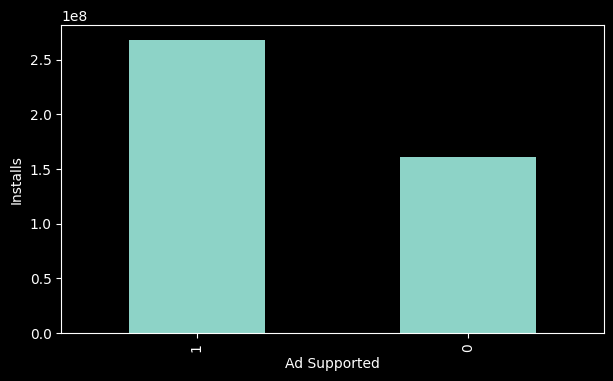

In [12]:
#get unique values of content rating
app_installs = df.groupby('Ad Supported')['Installs'].sum().sort_values(ascending=False).head(10)
app_installs.nlargest(15).plot(kind='bar', figsize=(7, 4))
plt.ylabel('Installs')


In [24]:
ANOVA_test(df, 'Ad Supported', 'Installs')

0.0

## Question 2
    Is there a relation between size and installs?

Text(0, 0.5, 'Installs')

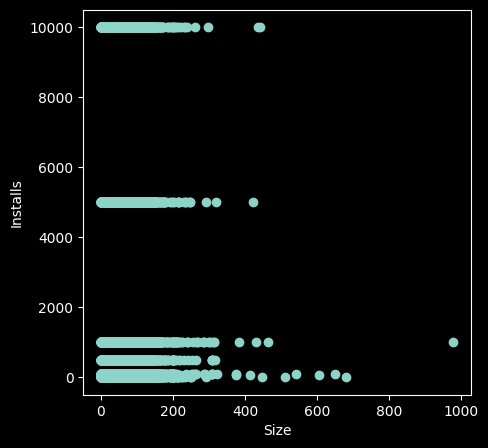

In [14]:
#scatter size vs installs
plt.figure(figsize=(5,5))
plt.scatter(df['Size'], df['Installs'])
plt.xlabel('Size')
plt.ylabel('Installs')

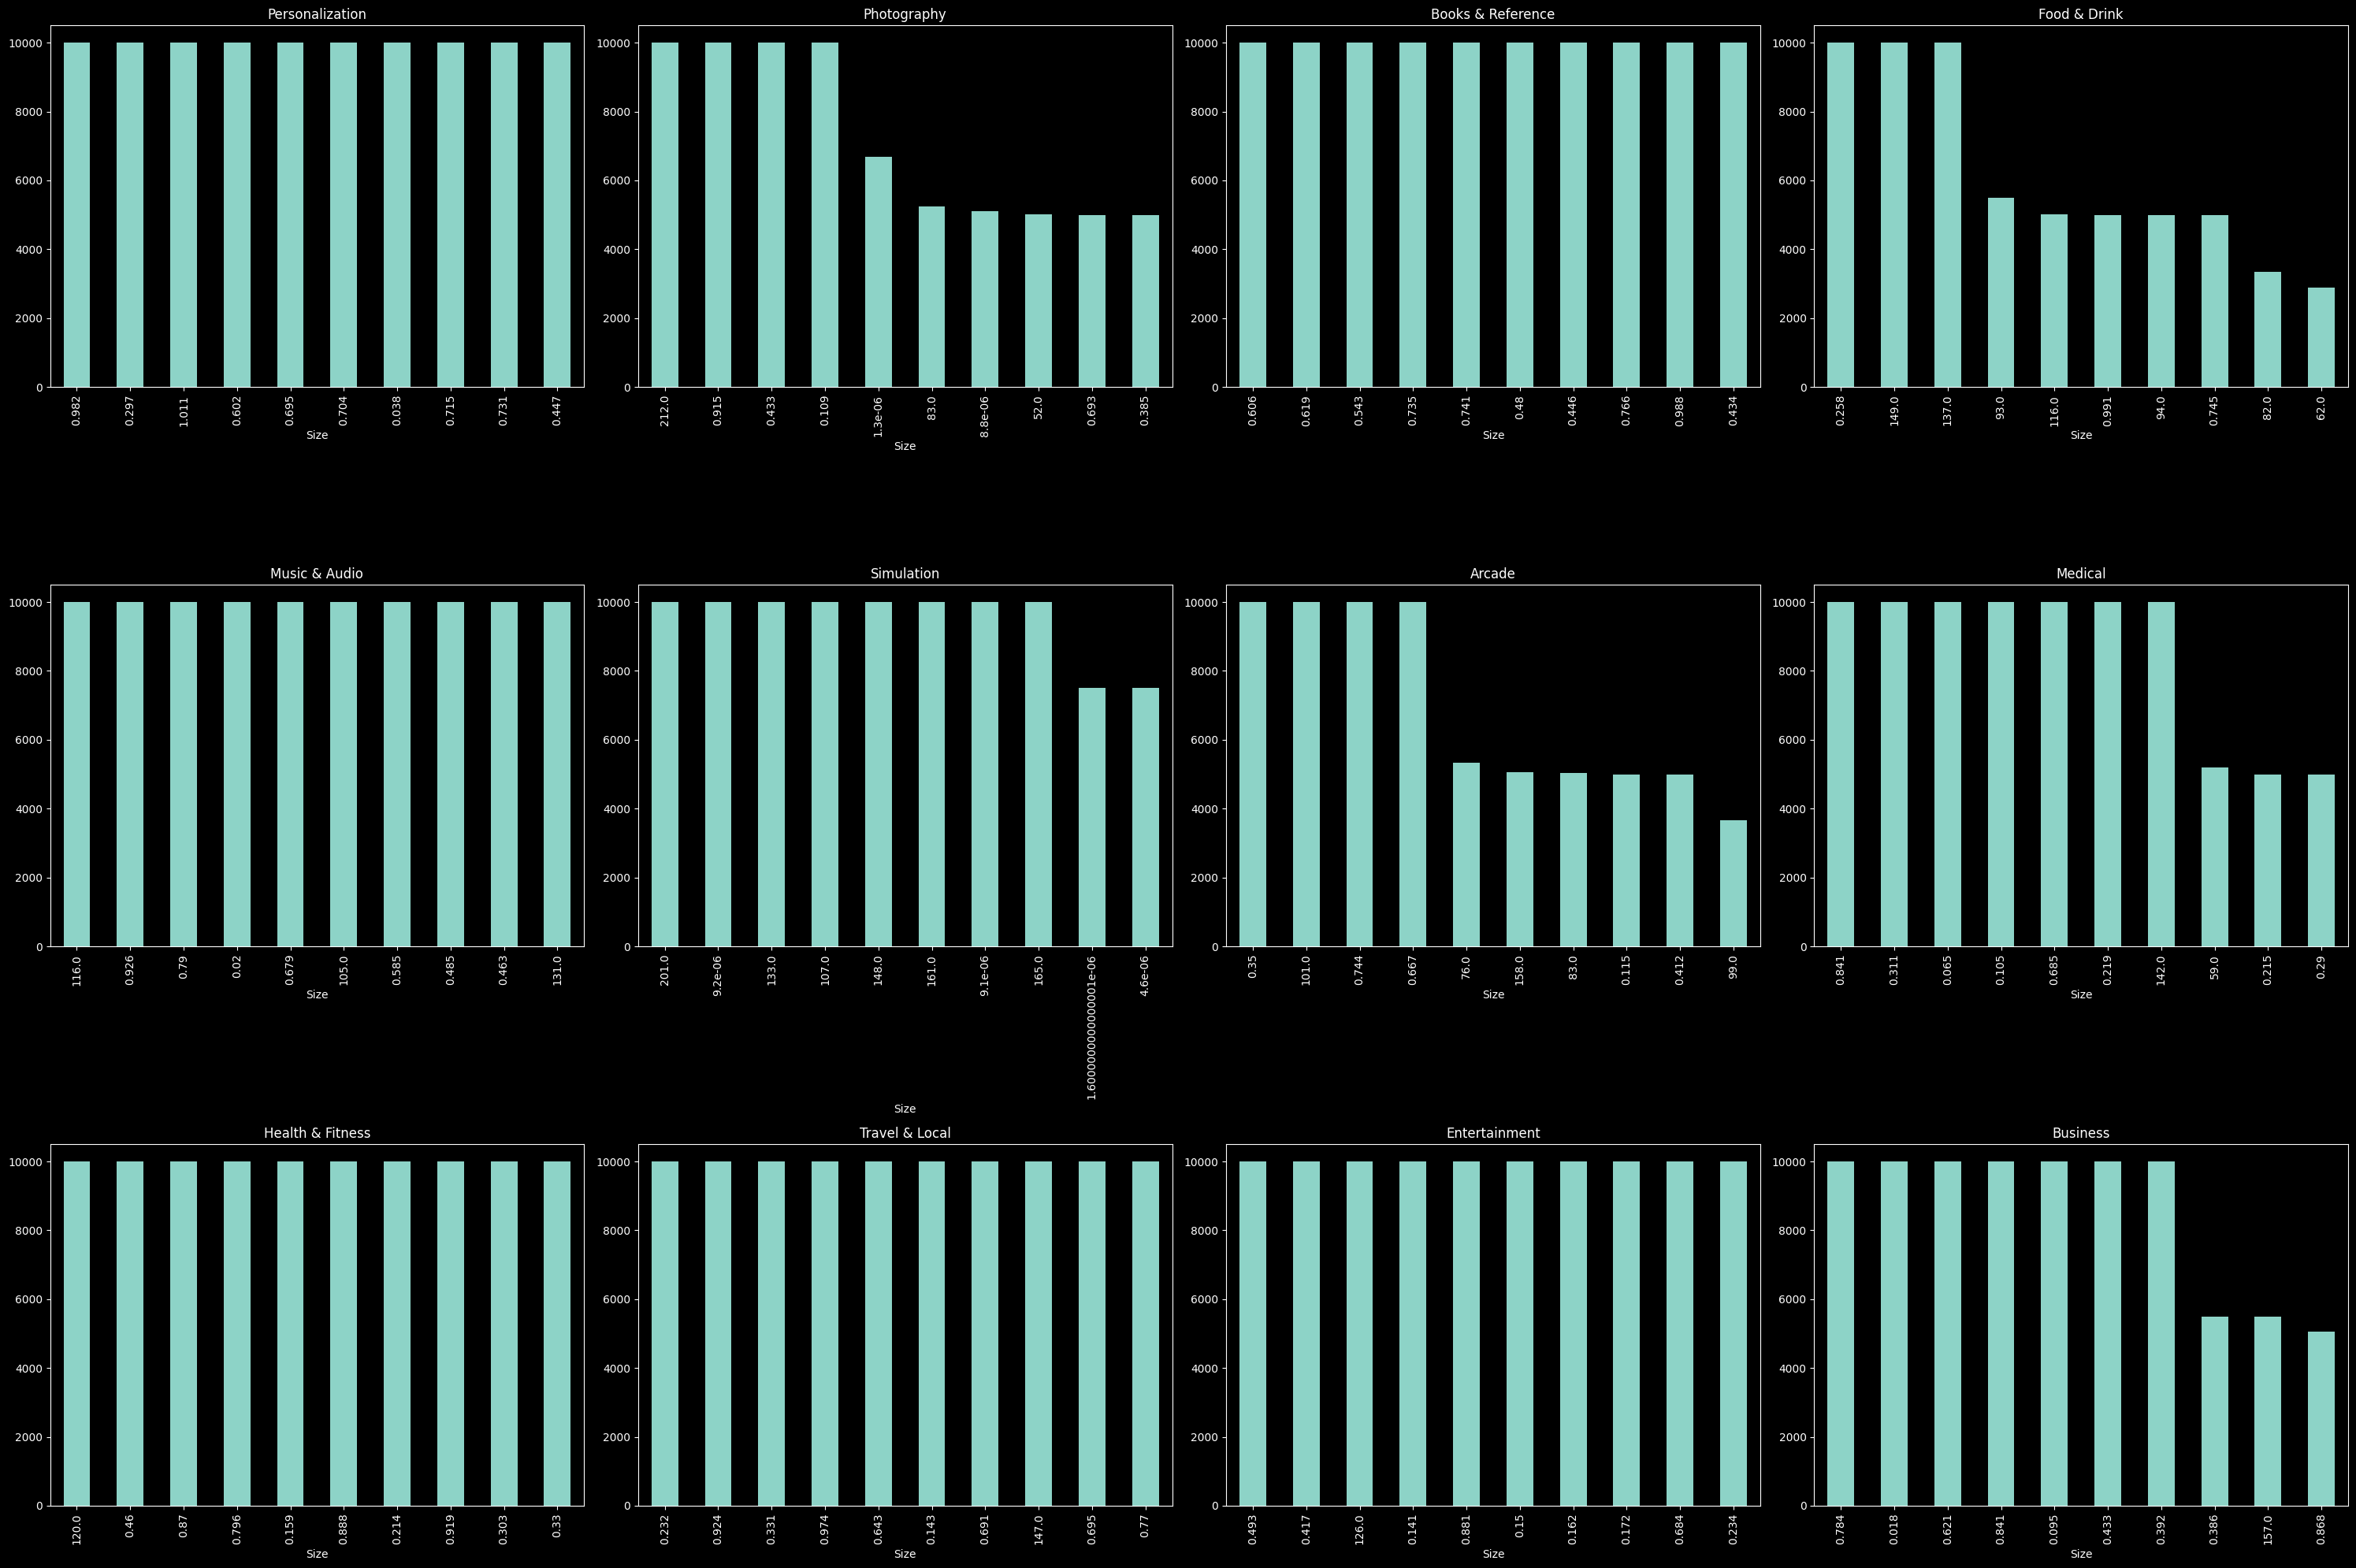

In [15]:
sub_blot(df, "Category", "Size", "Installs", "Mean Ratings by Last Updated for each category")

### Results:
    - number of installs is slightly affected by size, for some categories we
      can see that apps with very high sizes got less installs,but it's a not 
      key factor

## Question 3
    Is there a relation between install and minimum android version?

## Results

1- minimize number of version by combining them in less groups

In [16]:
df['Minimum Android'] = df['Minimum Android'].str[:3]
df['Minimum Android'] = pd.to_numeric(df['Minimum Android'], errors='coerce')
print("Number of unique values in Minimum Android: ", df['Minimum Android'].nunique())

Number of unique values in Minimum Android:  23


2- group all apps by minimum android version 

Text(0, 0.5, 'Installs')

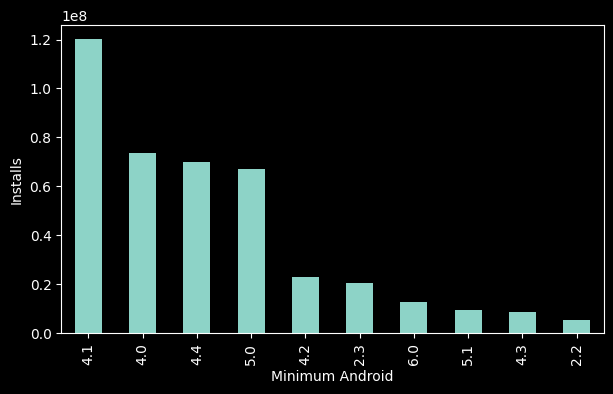

In [34]:
content_rating = df.groupby('Minimum Android')['Installs'].sum().sort_values(ascending=False).head(10)
content_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))

## Results
- apps that support medium android version that available for majority of users
  had the highest number of installs.
- so company may consider a reasonable android version when launching new app to 
  guarantee high number of installs



## Question 4
    Is there a relation between installs and Rating of app ?

### Add rating value column to represent real representation for the rating

In [18]:
df['Rating Count'] = df['Rating Count'].astype(float)
df['Rating_Value'] = df['Rating'] * df['Rating Count']

Text(0, 0.5, 'Installs')

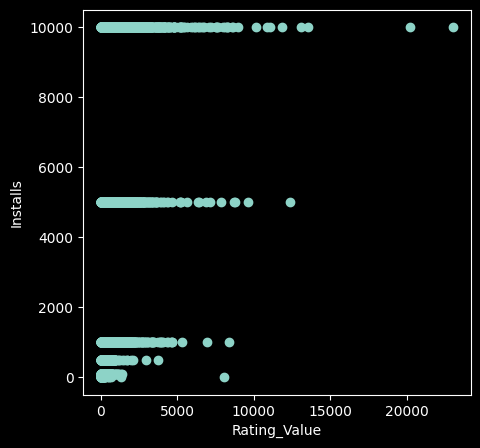

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(df['Rating_Value'], df['Installs'])
plt.xlabel('Rating_Value')
plt.ylabel('Installs')

### Top 10 Developers w.r.t number of installs

<Axes: title={'center': 'Top 10 Developers with highest Installs'}, xlabel='Developer Id'>

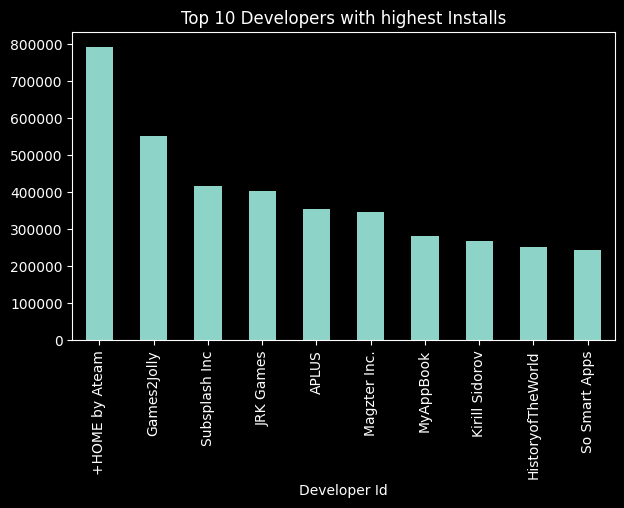

In [35]:
top_10_developers = df.groupby('Developer Id')['Installs'].sum().sort_values(ascending=False).head(10)
top_10_developers.nlargest(20).plot(kind='bar', figsize=(7, 4), title='Top 10 Developers with highest Installs')

## Results
  - No correlation between ratings and number of installs.
  - Top 10 developers w.r.t installs are not the same as top 10 w.r.t rating which
    may ensure this un correlation.
  - so installs don't reflect how good the app is specially that we don't have 
    column for number of uninstalls.
